In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [1]:
import os
import numpy as np
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm

In [2]:
metadata = pd.read_csv('C:/Users/user/PycharmProjects/pythonProject/CatSound/metadata/cat2.csv')
print(metadata.shape)
metadata.head()

(1120, 4)


,slice_file_name,fold,classID,class
0,purring (1).wav,1,0,purring
1,purring (2).wav,1,0,purring
2,purring (3).wav,1,0,purring
3,purring (4).wav,1,0,purring
4,purring (5).wav,1,0,purring


In [3]:
classes = metadata.groupby('classID')['class'].unique()
classes

classID
0     [purring]
1        [meow]
2    [grooming]
3    [drinking]
4          [wc]
5      [eating]
Name: class, dtype: object

In [4]:
import librosa
import librosa.display

In [10]:
def feature_extractor(path):
    data, simple_rate = librosa.load(path)
    data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
    data = np.mean(data,axis=1)
    return data

In [16]:
x, y = [], []
extracted_features=[]
for i,rows in tqdm(metadata.iterrows()):
    path = 'C:/Users/user/PycharmProjects/pythonProject/CatSound/audio/' + 'fold' + str(rows['fold']) + '/' + str(rows['slice_file_name'])
    x.append(feature_extractor(path))
    y.append(rows['classID'])
    fe = feature_extractor(path)
    final_class_labels=rows['class']
    extracted_features.append([fe,final_class_labels])
x = np.array(x)
y = np.array(y)
x.shape, y.shape

0it [00:00, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00214935  0.00035452  0.00301724 ... -0.01742576 -0.0218749
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00926653 0.01295875 0.00972124 ... 0.00687151 0.00401709 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
2it [00:00, 10.13it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 9.5941505e-06 -1.2529145e-04 -3.0513140e-04 ... -9.5857278e-04
 -1.2864487e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data

24it [00:02,  7.67it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00066193 0.00084451 0.00101636 ... 0.00594728 0.00572517 0.00613591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
25it [00:03,  7.17it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.01196941 -0.01399054 -0.0112576  ... -0.00520225 -0.00223482
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00221805  0.00352088  0.0033887  ... -0.01011728 -0.01332468
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128

48it [00:05,  8.54it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-7.8721938e-04 -1.0629281e-03 -8.7923656e-04 ...  1.9301113e-04
  1.2069487e-05 -2.3097449e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
49it [00:05,  7.87it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00366052 0.00501885 0.00406197 ... 0.00280217 0.00160646 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
50it [00:05,  8.12it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 3.3355765e-05 -1.1989618e-05 -1.7015310e-04 ...  1.7063931e-04
  2.2152919e-04  8.8233312e-05] as keyword args. From version 0.10 passing these as positional arguments will resul

72it [00:08,  7.92it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.0006621  0.00099375 0.00080067 ... 0.00073985 0.00080448 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
73it [00:08,  7.47it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.01040011  0.01519024  0.01312424 ...  0.00106623  0.00027658
 -0.00025085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
74it [00:09,  7.83it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-1.8430877e-03 -3.4560210e-03 -3.4472717e-03 ...  7.6568271e-05
  9.9922268e-05  2.1543758e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  da

96it [00:12,  7.07it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 8.3680279e-05 -4.2175136e-05 -2.0305687e-04 ...  8.7695610e-04
  1.5791644e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00260171  0.00325611  0.00241713 ...  0.00027894 -0.0001648
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
98it [00:12,  8.09it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.0001235  -0.00028736 -0.00039234 ... -0.00021787 -0.00055156
 -0.000901  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feat

120it [00:15,  7.53it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00077951 -0.00083271 -0.00057898 ...  0.00017948  0.00029752
  0.00044896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
121it [00:15,  7.69it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00518058 -0.00554287 -0.00189843 ...  0.00518207  0.0047856
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
122it [00:15,  7.97it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00094499 -0.0015865  -0.00159975 ...  0.00753012  0.01601204
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = libr

143it [00:18,  6.26it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.01654297 0.01885446 0.01529811 ... 0.00228839 0.00274561 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
144it [00:18,  6.29it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-1.1594332e-03  1.5606684e-05  2.0463364e-03 ...  7.5420137e-03
  7.3142620e-03  9.3822116e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
145it [00:18,  6.24it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00888129 0.00938695 0.00553464 ... 0.00237066 0.00242805 0.00256439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data =

167it [00:22,  6.09it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-1.4851430e-04 -4.9547976e-05  4.2040148e-04 ... -1.6564503e-02
 -1.6006827e-02 -1.8507445e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
168it [00:22,  6.11it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00427069 -0.00648018 -0.00487466 ... -0.00769327 -0.00788726
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
169it [00:22,  6.13it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00558978 -0.00810179 -0.00629012 ... -0.00120873 -0.00223009
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

191it [00:26,  6.54it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00141006  0.00228263  0.00220453 ... -0.00502128 -0.00510793
 -0.00602779] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
192it [00:26,  6.47it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-4.6638824e-04 -8.3269028e-04  1.1855342e-05 ... -1.0329557e-03
 -1.0560007e-03 -8.1112166e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
193it [00:26,  6.29it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-1.8606527e-04  2.9147539e-04 -8.3847146e-05 ...  1.0324537e-02
  9.6249767e-03  1.0174089e-02] as keyword args. From version 0.10 passing these as positional arguments 

215it [00:28, 23.82it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00693582  0.01082934  0.00449911 ... -0.02437055 -0.02168937
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.05480064  0.08589621  0.09874432 ... -0.01519233 -0.01633307
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00061604 -0.00094918  0.00027969 ... -0.00677767 -0.00433027
 -0.00408456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate

240it [00:29, 20.16it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00505352 -0.00561888 -0.00460891 ...  0.00833932  0.00918245
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.01033463 -0.0103027  -0.00796613 ... -0.00226418 -0.00505289
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00894604  0.0148497   0.01849359 ... -0.00163243 -0.00132555
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate

265it [00:30, 25.63it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.01553105  0.01958346  0.01800396 ... -0.01325017 -0.01342294
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00518446  0.00509825 -0.00143334 ... -0.00011858 -0.00072669
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.01002081 -0.01286356 -0.01157267 ...  0.01632044  0.01287149
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate

291it [00:31, 25.98it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.0126337  0.01216733 0.0098033  ... 0.00605128 0.00894982 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.03331597 -0.03550071 -0.03046064 ... -0.00310569 -0.00374763
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00088011  0.00286522 -0.00046183 ... -0.00254176 -0.00401174
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
294it

C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00282745 -0.00346331 -0.00295816 ...  0.00301458  0.00272521
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
317it [00:32, 21.56it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.07315912 -0.08931915 -0.08301897 ... -0.00446444 -0.0046092
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.03006916 -0.02262419 -0.0059871  ...  0.00788449  0.00773816
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)

344it [00:33, 26.22it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00764535 -0.01205742 -0.01143092 ... -0.00749894 -0.0050998
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00222161 -0.00242559 -0.00032165 ... -0.00440514 -0.00207263
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00297945 -0.00480183 -0.0009162  ... -0.00508286 -0.00697533
 -0.00404499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)

C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-9.3824616e-07 -5.4418233e-06 -7.0117007e-05 ... -4.8302761e-03
 -5.5809603e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00064137  0.00143092  0.0019096  ... -0.00067283  0.00064794
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
371it [00:34, 24.07it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00188764  0.0026988   0.00358534 ... -0.00763645 -0.0030876
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=1

C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00025607  0.0011114   0.00137093 ... -0.00494887 -0.00046862
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
396it [00:35, 23.13it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00753782 -0.01063207 -0.01049075 ...  0.00388097  0.0047538
  0.00555683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00434677 -0.00663902 -0.00447417 ...  0.00536133  0.01552577
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)

419it [00:38,  6.17it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-1.5473922e-03 -1.6133972e-03 -5.5698370e-06 ...  4.5854938e-03
  4.0752948e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
420it [00:39,  6.16it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.0020089  -0.00099644  0.00166935 ... -0.0070241  -0.00783681
 -0.00934778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
421it [00:39,  6.17it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00601707  0.00927655  0.00822838 ... -0.01457078 -0.01695423
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

443it [00:42,  6.44it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00075735 0.00406836 0.00169062 ... 0.00176178 0.00202053 0.00043148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
444it [00:42,  6.38it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00204459 0.00304347 0.00279915 ... 0.00187213 0.00182119 0.00195235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
445it [00:43,  6.44it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00337061 -0.00491088 -0.00419989 ... -0.01391319 -0.01308972
 -0.0147701 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.m

467it [00:46,  6.06it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00375531 -0.00069375 -0.00312369 ... -0.00302964 -0.00410212
 -0.00465907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
468it [00:46,  5.87it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00392781  0.0047984  -0.00106401 ... -0.00138784 -0.0013216
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
469it [00:46,  5.84it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00047123 0.00100498 0.0009221  ... 0.01346598 0.01371762 0.01444482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.fea

491it [00:50,  6.68it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00205561  0.00304271  0.00504116 ... -0.00290865  0.0031231
 -0.00098349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
492it [00:50,  6.49it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00579828 -0.00676831 -0.00628519 ...  0.00152926  0.00081514
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
493it [00:50,  6.34it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00223371 -0.00301545 -0.0027985  ... -0.00061604 -0.00021858
 -0.00036241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = libr

515it [00:54,  6.20it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00742596  0.01064988  0.00960538 ... -0.00394677 -0.00398572
 -0.00417361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
516it [00:54,  6.21it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.0022997   0.00369353  0.00129751 ...  0.00560583 -0.00041152
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
517it [00:54,  6.14it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00309789 -0.00475879 -0.00416003 ... -0.00530319 -0.006
 -0.00645006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.

539it [00:58,  6.74it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00144264  0.00194182  0.00175176 ... -0.02938705 -0.02447059
 -0.01971229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
540it [00:58,  6.62it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00188252  0.00260009 -0.00159469 ...  0.00297427  0.00374295
  0.00435633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
541it [00:58,  6.45it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.010717   -0.01347389 -0.0084246  ... -0.00028864 -0.00027718
 -0.00029217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = lib

563it [01:02,  5.83it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00168136 -0.00207585  0.00225542 ... -0.00308968 -0.00200715
 -0.00258033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
564it [01:02,  5.74it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00121987 -0.00154104 -0.00056774 ... -0.00057309 -0.00419697
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
565it [01:02,  5.91it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00316468 -0.00319382 -0.00066737 ... -0.00133405 -0.00099404
 -0.00393287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = lib

587it [01:06,  5.75it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00079033 -0.00059104 -0.0002565  ... -0.00160887 -0.0034858
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
588it [01:06,  5.74it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00223248 -0.0026099  -0.00296553 ...  0.0045622   0.00302038
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
589it [01:06,  5.54it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.0002429  -0.00084441  0.00090397 ... -0.00333423 -0.00238679
  0.0001087 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = libr

611it [01:10,  6.11it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.01260017  0.01787912  0.01628647 ... -0.00052436  0.00157663
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
612it [01:10,  5.68it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00227985 -0.00683336 -0.00519494 ...  0.01455023  0.02078398
  0.01068212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
613it [01:10,  6.45it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00227294  0.00039902  0.00505669 ...  0.00037726  0.00015356
  0.00043377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = lib

635it [01:14,  6.12it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00101656 -0.00112339  0.00132439 ... -0.00528723 -0.00631201
 -0.00690672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
636it [01:14,  6.33it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-1.0263816e-06 -1.9299384e-06  7.7765662e-06 ...  5.1311735e-04
 -9.2627050e-04 -2.7112793e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
637it [01:14,  6.83it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00562089 -0.00801552 -0.00479344 ... -0.02869733 -0.03798581
 -0.03817944] as keyword args. From version 0.10 passing these as positional arguments will result in an 

659it [01:17,  6.21it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00971809 -0.01553299 -0.01213374 ... -0.0011607  -0.00124784
 -0.00176157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
660it [01:17,  6.81it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00592759 -0.0073299  -0.00276559 ... -0.00425918 -0.00407381
 -0.00403174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
661it [01:18,  7.26it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00250079  0.00792853  0.00851345 ... -0.00293357 -0.00363037
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = lib

683it [01:21,  6.65it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00819369 0.00936799 0.00748754 ... 0.01053591 0.01274997 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
684it [01:21,  6.83it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00570993 -0.00704523 -0.00636706 ...  0.00673701  0.00766963
  0.00784238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
685it [01:21,  7.24it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-2.1484586e-04  8.7453678e-05 -2.2705927e-04 ... -2.0252899e-04
  3.0411570e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
 

707it [01:25,  6.07it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00619473 0.0127097  0.01400071 ... 0.01070248 0.00791561 0.00289978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
708it [01:25,  5.57it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.01254089 0.01582691 0.01221862 ... 0.00397989 0.00731065 0.01451199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
709it [01:25,  6.22it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00200328 -0.00752134 -0.00762054 ...  0.0025717   0.00331863
  0.00607136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.m

731it [01:28,  8.64it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-4.5069396e-03 -7.0575052e-03 -6.7987167e-03 ...  3.8775406e-04
  5.5688324e-05 -2.5537045e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.02380149 0.02978296 0.02840324 ... 0.06013422 0.0505964  0.04406264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
733it [01:28,  9.26it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00059202 -0.00110365 -0.00104452 ...  0.00665045  0.01130398
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.

755it [01:32,  7.30it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[1.6540384e-02 2.3358228e-02 2.0794142e-02 ... 7.8350109e-05 2.7114834e-04
 3.1363161e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 4.8659418e-05 -3.3318079e-03 -4.5702592e-03 ... -1.9264506e-02
 -2.0057665e-02 -2.5066929e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
757it [01:32,  8.80it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00874673 0.01168549 0.01062521 ... 0.01890796 0.01568103 0.01733533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = libr

779it [01:34,  8.28it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00268779 -0.00416571 -0.00360217 ...  0.00280688  0.00335565
  0.00331709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
780it [01:35,  8.37it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00073969  0.00026266 -0.00033862 ... -0.00156165 -0.00117033
 -0.00199743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
781it [01:35,  8.36it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00075176 -0.00063129  0.00101542 ...  0.00287243  0.0005562
  0.00082914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = libr

803it [01:37,  6.56it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00303679  0.00280144 -0.00081994 ...  0.00090308  0.00106893
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
804it [01:38,  6.02it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-6.8452842e-05 -1.8436500e-04 -2.5876841e-04 ... -2.6187287e-03
  2.2462802e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
805it [01:38,  6.06it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-9.8062490e-05 -2.2695540e-03 -1.7681213e-04 ...  7.1136281e-04
 -2.5358992e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments 

826it [01:41,  6.29it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 2.4085951e-03  3.8066483e-03  2.9832229e-03 ... -2.2405295e-06
  5.1002903e-06 -5.3952031e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
827it [01:41,  6.02it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00038076  0.00068676  0.00051541 ... -0.00335986 -0.00355402
 -0.00401188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
828it [01:42,  5.79it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-7.5246516e-04 -6.6898757e-04  8.9006207e-05 ... -2.0686700e-04
 -3.7736862e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments 

850it [01:45,  6.62it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00471761  0.009977    0.01728927 ... -0.00479366 -0.00369099
 -0.00350719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00020741 -0.00018674 -0.00033302 ...  0.00290781 -0.00041018
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
852it [01:45,  8.04it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00124879 0.00276922 0.00199019 ... 0.00013505 0.00043916 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=1

874it [01:48,  7.37it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00343533  0.01076982  0.00168774 ... -0.00079718 -0.00290274
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
875it [01:48,  6.39it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00655994 -0.00973517 -0.00862639 ... -0.00070737  0.00596754
  0.00637473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
876it [01:48,  7.03it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-7.6044191e-05  2.2231854e-04  4.6550756e-04 ...  4.0438210e-04
 -6.1844790e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an 

898it [01:51,  7.76it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00070625  0.00048351 -0.00056861 ... -0.0018413  -0.00315366
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
899it [01:51,  8.07it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00101389  0.00409152  0.0030865  ... -0.00107705 -0.00054819
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
900it [01:51,  7.95it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00046527  0.00010471 -0.00010579 ...  0.0035202   0.00388885
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = lib

923it [01:54,  9.08it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 3.92312679e-04  1.20173216e-04 -3.78546480e-04 ... -1.18043146e-03
 -3.75696727e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
924it [01:54,  8.42it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00030867  0.0006309   0.0003341  ... -0.00078687 -0.00082902
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00175521  0.00242152  0.00220631 ... -0.00521563 -0.00560299
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = lib

947it [01:57,  8.24it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00091827 -0.00072103 -0.00013003 ... -0.00014698  0.0002102
  0.00013736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
948it [01:57,  7.64it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-1.2267299e-03 -1.7217357e-03 -1.5392515e-03 ... -3.8596816e-05
 -1.8178032e-05  6.1877660e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
949it [01:57,  6.90it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00793337 -0.0116526  -0.01064478 ...  0.00730589  0.00812616
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an e

971it [02:00,  7.28it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00043583 0.00071826 0.00038923 ... 0.00947945 0.01056766 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00067903 -0.001266   -0.00109004 ...  0.00060161  0.00110644
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
973it [02:00,  7.72it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00442351  0.00674009  0.00608013 ... -0.00028321 -0.00133961
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=1

995it [02:04,  6.80it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00826294 0.01158874 0.00910907 ... 0.00101785 0.00099575 0.00131228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
996it [02:04,  7.02it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-6.0640177e-04 -5.1514874e-04 -5.4502889e-04 ... -8.6581113e-04
 -8.3532307e-04  4.0670740e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
997it [02:04,  6.62it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 8.4692547e-05  3.0651674e-05  5.4494920e-04 ...  5.8821240e-04
 -3.6400499e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will re

1019it [02:07,  7.45it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00012751 -0.00122152 -0.00205198 ... -0.00175139 -0.00202013
 -0.00199553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
1020it [02:07,  7.05it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00171829  0.00232997  0.00159652 ... -0.00028246 -0.00044461
 -0.00032968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
1021it [02:07,  6.60it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00678488  0.0093177   0.00723244 ... -0.0017638  -0.00267397
 -0.00213847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = 

1043it [02:11,  6.52it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-8.6205633e-04 -7.2909659e-04 -2.3204655e-05 ... -7.6198230e-05
 -5.1154266e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-5.1404687e-04 -1.0786824e-03 -2.8451518e-04 ... -2.6899156e-06
 -1.2999348e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
1045it [02:11,  8.11it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00091353  0.00155843  0.00158287 ... -0.00182433 -0.00152619
 -0.00181961] as keyword args. From version 0.10 passing these as positional arguments will result in an erro

1067it [02:14,  7.72it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[ 0.00082024  0.0014703   0.00085279 ... -0.00103229 -0.00040345
 -0.00123711] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
1068it [02:14,  8.02it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00040534 -0.00076649 -0.00108316 ...  0.00023007  0.00074082
  0.00050709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
1069it [02:14,  7.58it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00070656 -0.00175122 -0.00204939 ... -0.00307022 -0.00239247
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = 

1091it [02:18,  6.13it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[0.00255148 0.00362147 0.0027464  ... 0.00341091 0.00377406 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
1092it [02:18,  6.46it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00245083 -0.00315459 -0.00216644 ...  0.01218687  0.01129821
  0.01170901] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
1093it [02:18,  6.99it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-1.6957745e-03 -2.0135702e-03 -9.7632431e-04 ... -2.7470550e-04
 -3.4008495e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an erro

1115it [02:21,  6.67it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00732568 -0.0103679  -0.00992468 ...  0.00325391  0.00329599
  0.0036034 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.00441416 -0.00696107 -0.00658884 ... -0.00016308 -0.00115412
  0.00083368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data,n_mfcc=128,sr=simple_rate)
1117it [02:22,  8.24it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10996\1977356036.py:3: FutureWarning: Pass y=[-0.0029865  -0.0044904  -0.00426009 ... -0.00324585 -0.00476813
 -0.00474447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data

((1120, 128), (1120,))

In [17]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-312.18478, 125.071014, -64.47501, 56.468628,...",purring
1,"[-408.58997, 146.62447, 32.391697, 36.671593, ...",purring
2,"[-440.81326, 190.86948, -21.095238, -6.7931995...",purring
3,"[-373.53268, 150.26164, 44.241188, 31.615002, ...",purring
4,"[-578.2753, 163.7805, 61.469208, 17.083605, -3...",purring


In [18]:
y = to_categorical(y)
y.shape

(1120, 6)

In [19]:
xtrainval, xtest, ytrainval, ytest = train_test_split(x,y,test_size=0.1,stratify=y,random_state=387)
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrainval,ytrainval,test_size=0.2,stratify=ytrainval,random_state=387)
print('\nNumber of samples for Train set :',xtrain.shape[0])
print('Number of samples for Validation set :',xvalid.shape[0])
print('Number of samples for Test set :',xtest.shape[0])


Number of samples for Train set : 806
Number of samples for Validation set : 202
Number of samples for Test set : 112


In [20]:
print('\nNumber of samples for Train set :',ytrain.shape[0])
print('Number of samples for Validation set :',yvalid.shape[0])
print('Number of samples for Test set :',ytest.shape[0])


Number of samples for Train set : 806
Number of samples for Validation set : 202
Number of samples for Test set : 112


In [22]:
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [23]:
input_dim = (16, 8, 1)

In [24]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_dim))
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation = hp.Choice("activation", ["relu", "tanh"])))
    model.add(layers.Dense(6, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [26]:
checkpointer = ModelCheckpoint(filepath='saved_models/cat_model_ann1.hdf5', 
                               verbose=1, save_best_only=True)

In [27]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    overwrite=True)

In [28]:
tuner.search(xtrain, ytrain,
             epochs=50,
             verbose=10,
             batch_size=20,
             validation_data=(xvalid, yvalid))

Trial 5 Complete [00h 00m 41s]
val_accuracy: 0.9884488383928934

Best val_accuracy So Far: 0.9900989929835001
Total elapsed time: 00h 03m 10s
INFO:tensorflow:Oracle triggered exit


In [29]:
best_hp=tuner.get_best_hyperparameters()[0]

In [30]:
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()
history=h_model.fit(xtrain, ytrain, epochs=50, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 448)               57792     
_________________________________________________________________
dense_13 (Dense)             (None, 384)               172416    
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 2310      
Total params: 232,518
Trainable params: 232,518
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
21/21 [==============================] - 0s 15ms/step - loss: 0.9125 - accuracy: 0.7189 - val_loss: 0.2818 - val_accuracy: 0.9321
Epoch 2/50
21/21 [==============================] - 0s 12ms/step - loss: 0.1737 - accuracy: 0.9565 - val_

Epoch 45/50
21/21 [==============================] - 0s 3ms/step - loss: 2.0380e-04 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 0.9877
Epoch 46/50
21/21 [==============================] - 0s 5ms/step - loss: 1.9621e-04 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9877
Epoch 47/50
21/21 [==============================] - 0s 4ms/step - loss: 1.9007e-04 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 0.9877
Epoch 48/50
21/21 [==============================] - 0s 5ms/step - loss: 1.8234e-04 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9877
Epoch 49/50
21/21 [==============================] - 0s 5ms/step - loss: 1.7618e-04 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9877
Epoch 50/50
21/21 [==============================] - 0s 4ms/step - loss: 1.7100e-04 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 0.9877


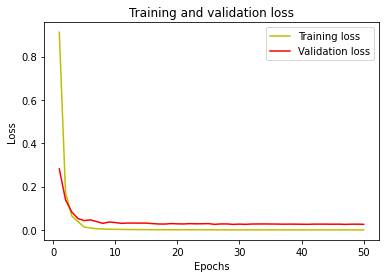

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

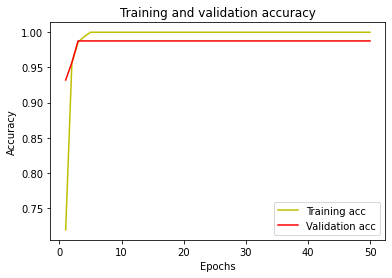

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
train_hist = pd.DataFrame(history.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,0.912501,0.718944,0.281781,0.932099
1,0.173684,0.956522,0.139631,0.956790
2,0.065302,0.986025,0.083110,0.987654
3,0.038135,0.993789,0.052845,0.987654
4,0.013462,1.000000,0.043187,0.987654
5,0.009012,1.000000,0.046366,0.987654
6,0.005578,1.000000,0.038704,0.987654
7,0.004203,1.000000,0.030459,0.987654
8,0.003314,1.000000,0.036557,0.987654
9,0.002741,1.000000,0.034229,0.987654


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
ytrue = np.argmax(ytest,axis=1)
ypred = np.argmax(h_model.predict(xtest),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[19  1  0  0  0  0]
 [ 0 19  0  0  1  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 20]]


Classification Report : 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        20

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



In [39]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 2
units_0: 448
activation: tanh
units_1: 384
learning_rate: 0.001
units_2: 288
units_3: 192
units_4: 64
units_5: 96
units_6: 288
units_7: 224
units_8: 480
units_9: 352
units_10: 320
units_11: 160
units_12: 96
units_13: 448
units_14: 64
units_15: 416
Score: 0.9900989929835001
Trial summary
Hyperparameters:
num_layers: 11
units_0: 448
activation: relu
units_1: 352
learning_rate: 0.001
units_2: 288
units_3: 96
units_4: 96
units_5: 320
units_6: 96
units_7: 96
units_8: 384
units_9: 64
units_10: 288
units_11: 256
units_12: 448
units_13: 256
units_14: 448
units_15: 192
units_16: 416
Score: 0.9884488383928934
Trial summary
Hyperparameters:
num_layers: 17
units_0: 480
activation: relu
units_1: 448
learning_rate: 0.001
units_2: 160
units_3: 480
units_4: 192
units_5: 480
units_6: 128
units_7: 352
units_8: 160
units_9: 480
units_10: 320
units_11: 32
units_12: 416
units_13: 192
units_14: 

In [40]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units_0': 448,
 'activation': 'tanh',
 'units_1': 384,
 'learning_rate': 0.001,
 'units_2': 288,
 'units_3': 192,
 'units_4': 64,
 'units_5': 96,
 'units_6': 288,
 'units_7': 224,
 'units_8': 480,
 'units_9': 352,
 'units_10': 320,
 'units_11': 160,
 'units_12': 96,
 'units_13': 448,
 'units_14': 64,
 'units_15': 416}

In [31]:
# evaluate the model
_, train_acc = h_model.evaluate(xtrain, ytrain, verbose=0)
_, test_acc = h_model.evaluate(xtest, ytest, verbose=0)

In [32]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.998, Test: 0.982


In [33]:
predictions = h_model.predict(xtest)
score = h_model.evaluate(xtest, ytest)
print(score)

4/4 [==============================] - 0s 5ms/step - loss: 0.0482 - accuracy: 0.9821
[0.04820621386170387, 0.9821428656578064]


In [65]:
def predict(path):
    audio = np.array([feature_extractor(path)])
    classid = np.argmax(h_model.predict(audio)[0])
    print('Class predicted :',classes[classid][0],'\n\n')
    return ipd.Audio(path)

In [66]:
predict('C:/Users/user/PycharmProjects/pythonProject/CatSound/purring (68).wav')

C:\Users\user\AppData\Local\Temp\ipykernel_12560\102498035.py:3: FutureWarning: Pass y=[ 0.0105341   0.01570418  0.01328166 ... -0.00194108 -0.0020591
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = lb.feature.mfcc(data,n_mfcc=128)


Class predicted : purring 


